
---
# VIDEO: Image smoothing and sharpening
---


cv2.filter2D(image, ddepth, kernel)
 
ddepth =  deirnlik 

kernel: filtre 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(512, 512, 3)


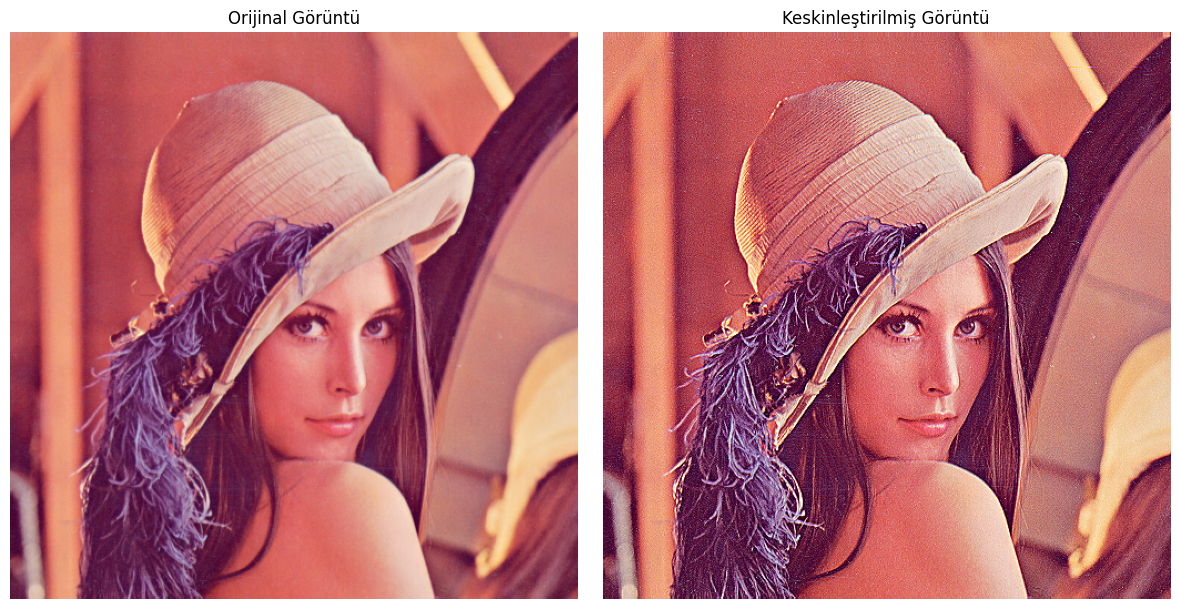

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = "Lenna.png"  
image = cv2.imread(image_path)

print(image.shape)
# Görüntüyü BGR'den RGB'ye dönüştür 
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# sharping filter 
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])
#merkezi pikseli vurgulayıp çevresindeki piksellerin etkisini azaltan 

sharpened_image = cv2.filter2D(image_rgb, 3, kernel)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Orijinal Görüntü')
plt.imshow(image_rgb)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Keskinleştirilmiş Görüntü')
plt.imshow(sharpened_image)
plt.axis('off')

plt.tight_layout()
plt.show()


gauss sharping


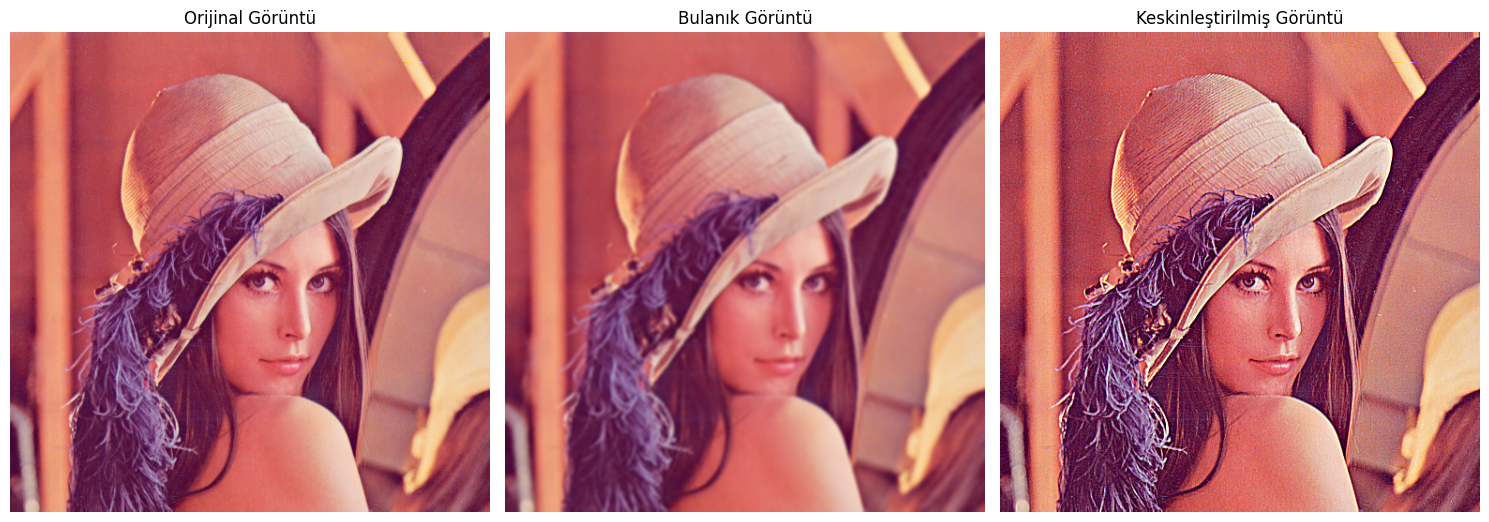

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

 
image_path = 'Lenna.png'  
image = cv2.imread(image_path)

 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

 
sigma = 2   
blurred = cv2.GaussianBlur(image, (5, 5), sigma)

alpha = 2  
sharpened = cv2.addWeighted(image, 1 + alpha, blurred, -alpha, 0)


plt.figure(figsize=(15, 10))
plt.subplot(1, 3, 1)
plt.title('Orijinal Görüntü')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Bulanık Görüntü')
plt.imshow(blurred)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Keskinleştirilmiş Görüntü')
plt.imshow(sharpened)
plt.axis('off')

plt.tight_layout()
plt.show()



---
# VIDEO: Image narrowband filtering
---


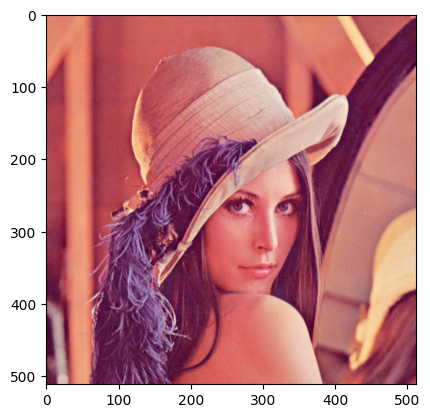

In [21]:
plt.imshow(image)
img=image
import scipy

In [29]:
fft_=np.fft.fftshift(image)

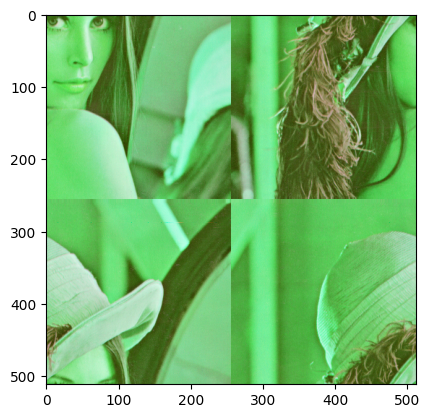

In [30]:
plt.imshow(fft_)

In [37]:
image

KENAR ALGILAMA

(432, 650)
125.0


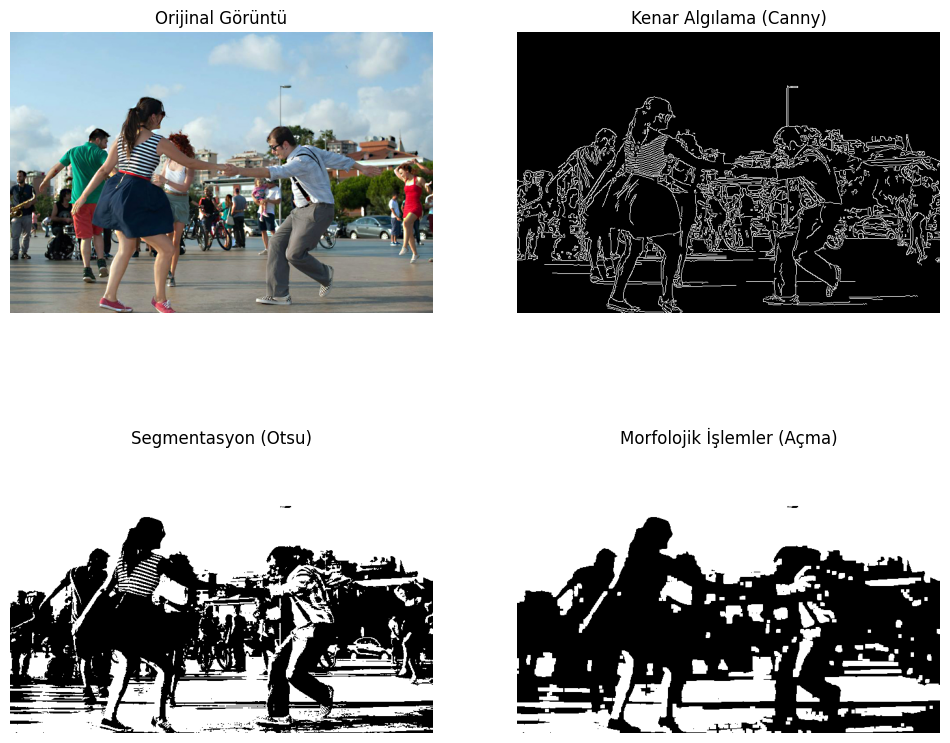

In [49]:
 
image_path = 'image.png'  
image = cv2.imread(image_path)

# OPEN CV BLUE GREY RED OLARAK OKUYOR .

image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(image_gray.shape)
edges = cv2.Canny(image_gray, 100, 200)  # CANNY KENAR ALGILAMA , GİRİŞ GRİ OLARAK ÇEVRİLMELİ 

# Görüntü segmentasyonu (Otsu'nun eşitleme yöntemi) :Otsu eşikleme yöntemi kullanarak segmentasyon (nesneleri ve arka planı ayırma) yapar. 
# Otsu yöntemi, görüntüyü iki sınıfa (örneğin nesneler ve arka plan) ayırmak için otomatik bir eşik değeri seçer.
_, segmented = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(_) # otsu yönteminin bulduğu eşik yöntemi  piksel yoğunluklarının histogramında iki ayrı tepe varsa etkili olur. Otsu yöntemi, bu iki tepe arasındaki en uygun ayırma noktasını (eşik değerini) seçer.



kernel = np.ones((5, 5), np.uint8)
morph_open = cv2.morphologyEx(segmented, cv2.MORPH_OPEN, kernel)

#gürültüyü azaltmak veya küçük nesneleri ortadan kaldırmak amacıyla morfolojik açma işlemi uyguluyor.
#  Morfolojik işlemler, genellikle görüntü işleme ve nesne tespiti sırasında kullanılan tekniklerdir. 
# Bu adımların amacı, segmentasyon sonrası elde edilen görüntüdeki istenmeyen küçük gürültüleri temizlemektir.
# lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=50, maxLineGap=10)

plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.title('Orijinal Görüntü')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Kenar Algılama (Canny)')
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Segmentasyon (Otsu)')
plt.imshow(segmented, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Morfolojik İşlemler (Açma)')
plt.imshow(morph_open, cmap='gray')
plt.axis('off')


plt.show()


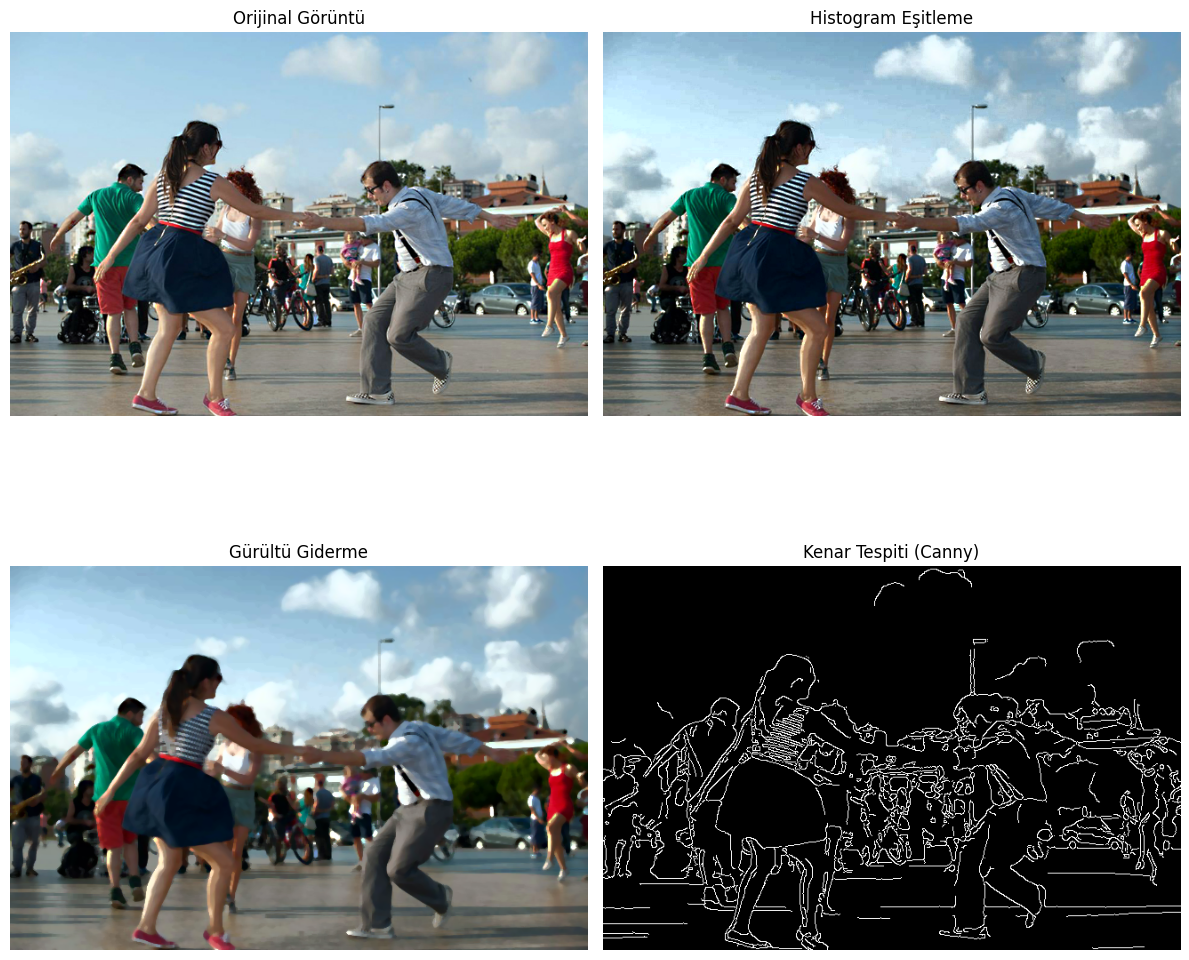

In [47]:
from skimage import exposure

 
image_path = 'image.png'  
image = cv2.imread(image_path)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  


image_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
channels = cv2.split(image_yuv)
cv2.equalizeHist(channels[0], channels[0])  # Y kanalında histogram eşitleme
image_yuv_eq = cv2.merge(channels)
image_eq = cv2.cvtColor(image_yuv_eq, cv2.COLOR_YUV2BGR)

# Gürültü giderme (Median filtre)
image_denoised = cv2.medianBlur(image_eq, 5)

# Kenar tespiti (Canny)
edges = cv2.Canny(image_denoised, 100, 200)

# Subplot ayarları
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Orijinal görüntü
axs[0, 0].imshow(image_rgb)
axs[0, 0].set_title('Orijinal Görüntü')
axs[0, 0].axis('off')

# Histogram eşitleme sonucu
axs[0, 1].imshow(cv2.cvtColor(image_eq, cv2.COLOR_BGR2RGB))
axs[0, 1].set_title('Histogram Eşitleme')
axs[0, 1].axis('off')

# Gürültü giderme sonucu
axs[1, 0].imshow(cv2.cvtColor(image_denoised, cv2.COLOR_BGR2RGB))
axs[1, 0].set_title('Gürültü Giderme')
axs[1, 0].axis('off')

# Kenar tespiti sonucu
axs[1, 1].imshow(edges, cmap='gray')
axs[1, 1].set_title('Kenar Tespiti (Canny)')
axs[1, 1].axis('off')

# Grafiği göster
plt.tight_layout()
plt.show()


 Histogram eşitleme, bir görüntünün kontrastını artırmak amacıyla kullanılan bir görüntü işleme tekniğidir. Bu yöntem, görüntüdeki piksel değerlerinin dağılımını daha dengeli hale getirerek, görüntüdeki detayların daha belirgin olmasını sağlar.

Histogram Nedir?
Bir görüntünün histogramı, görüntüdeki her bir piksel değeri için o değerin ne kadar sıklıkla bulunduğunu gösteren bir grafik veya tablo gibidir. Yani, görüntüdeki farklı yoğunluk seviyelerinin (piksellerin gri tonları veya renkleri) dağılımını görselleştirir.

Histogram Eşitleme Nasıl Çalışır?
Görüntüdeki Piksel Değerlerini Analiz Etme: İlk olarak, görüntüdeki mevcut piksel değerlerinin histogramı çıkarılır.

Cumulative Distribution Function (CDF): Histogramdaki her piksel değeri için kümülatif dağılım fonksiyonu (CDF) hesaplanır. Bu, belirli bir piksel değerinin altında kalan tüm piksel değerlerinin toplamını temsil eder.

Yeni Piksel Değerleri Hesaplama: CDF kullanılarak, her bir pikselin yeni değeri hesaplanır. Bu, görüntüdeki piksel değerlerinin daha geniş bir aralığa yayılmasını sağlar.

Yeni Görüntüyü Oluşturma: Hesaplanan yeni piksel değerleri ile görüntü yeniden oluşturulur.

Histogram Eşitlemenin Avantajları
Kontrast Artışı: Düşük kontrastlı görüntülerde detayların daha görünür hale gelmesini sağlar.
Detayların Belirginleşmesi: Görüntüdeki önemli detaylar, daha net bir şekilde görünür hale gelir.
Histogram Eşitlemenin Dezavantajları
Aşırı Eşitleme: Çok aşırı bir histogram eşitleme, görüntünün doğal görünümünü bozabilir ve gürültüleri artırabilir.
Sınırlı Uygulama: Özellikle belirli durumlarda (örneğin, renkli görüntülerde) daha karmaşık teknikler gerekebilir.
Uygulama Alanları
Histogram eşitleme, tıbbi görüntüleme, uydu görüntü analizi, fotoğraf düzenleme ve diğer birçok görüntü işleme uygulamalarında yaygın olarak kullanılmaktadır.

Özetle, histogram eşitleme, görüntülerin kontrastını artırarak daha net ve belirgin hale getirmenin etkili bir yoludur.

H (Hue): Rengin tonunu belirler (0-180 derece, 0 kırmızı, 60 sarı, 120 yeşil, 240 mavi vb.).
S (Saturation): Rengin doygunluğunu belirtir (0 tamamen gri, 255 tam renk doygunluğu).
V (Value): Rengin parlaklığını gösterir (0 siyah, 255 tam parlaklık).
HSV renk uzayında çalışmak, belirli bir rengin tonunu ve parlaklık seviyesini daha iyi ayırt etmemizi sağlar.

In [57]:
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

lower_green = np.array([10, 1,0])
upper_green = np.array([255, 255,255])


mask = cv2.inRange(hsv, lower_green, upper_green)


result = cv2.bitwise_and(image, image, mask=mask)

    
cv2.imshow('Original', image)
cv2.imshow('Mask', mask)
cv2.imshow('Segmented', result)
cv2.waitKey(0)
cv2.destroyAllWindows()


(432, 650)

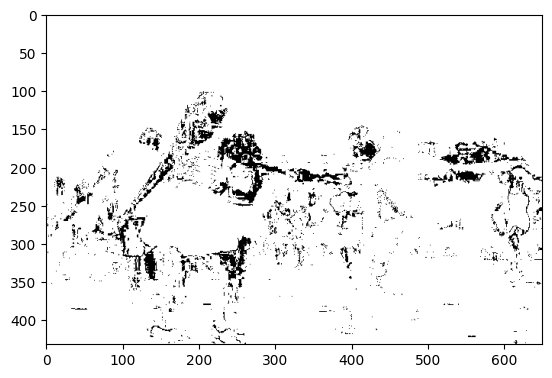

In [53]:
plt.imshow(mask,cmap="gray")
mask.shape

(432, 650, 3)


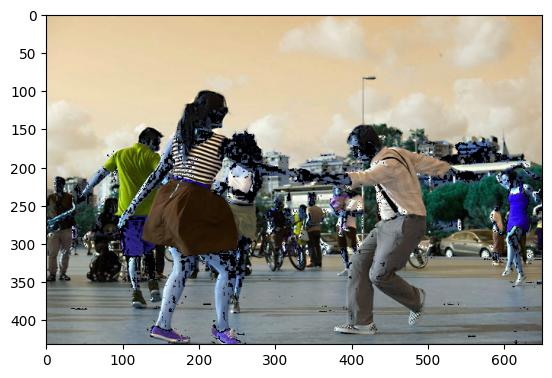

In [56]:
plt.imshow(result,cmap="viridis")
print(result.shape)